In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/creditcard.csv')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
# Preprocess the data
scaler = StandardScaler()
data['normalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Class'], axis=1), data['Class'], test_size=0.2, random_state=42)

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(32, input_shape=(29,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, callbacks=[early_stopping])

Epoch 1/20
1781/1781 [==============================] - 6s 3ms/step - loss: 0.0283 - accuracy: 0.9939 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 2/20
1781/1781 [==============================] - 9s 5ms/step - loss: 0.0062 - accuracy: 0.9989 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 3/20
1781/1781 [==============================] - 10s 6ms/step - loss: 0.0054 - accuracy: 0.9989 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 4/20
1781/1781 [==============================] - 6s 3ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 5/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 6/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.0034 - val_accuracy: 0.9992
Epoch 7/20
1781/1781 [==============================] - 6s 3ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.0031 - val_accuracy

In [ ]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.003184532979503274
Test accuracy: 0.9993855357170105


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification report:\n{classification_report(y_test, y_pred)}\n")

1781/1781 [==============================] - 3s 2ms/step
Confusion matrix:
[[56851    13]
 [   20    78]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962




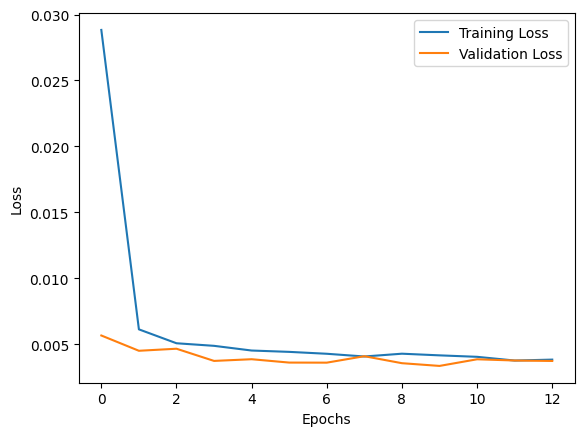

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss vs. epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


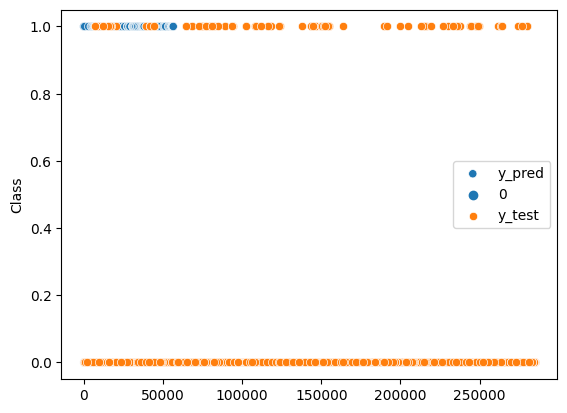

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the training and validation loss vs. epochs
sns.scatterplot(y_pred, label='y_pred')
sns.scatterplot(y_test, label='y_test')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold

# Define the number of splits for Stratified validation
n_splits = 5

# Define the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define the lists to store the results
losses = []
accuracies = []

# Loop over the StratifiedKFold splits
for train_index, test_index in skf.split(data.drop(['Class'], axis=1), data['Class']):
    # Split the data into train and test sets for the current fold
    X_train, X_test = data.drop(['Class'], axis=1).iloc[train_index], data.drop(['Class'], axis=1).iloc[test_index]
    y_train, y_test = data['Class'].iloc[train_index], data['Class'].iloc[test_index]

    # Define the model
    model = Sequential()
    model.add(Dense(32, input_shape=(29,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, callbacks=[early_stopping])

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    losses.append(loss)
    accuracies.append(accuracy)

# Print the average results across all folds
print('Average loss:', np.mean(losses))
print('Average accuracy:', np.mean(accuracies))


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
1781/1781 [==============================] - 8s 3ms/step - loss: 0.0272 - accuracy: 0.9941 - val_loss: 0.0046 - val_accuracy: 0.9992
Epoch 2/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 0.0043 - val_accuracy: 0.9992
Epoch 3/20
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 4/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 5/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 6/20
1781/1781 [==============================] - 6s 3ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 7/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
1781/1781 [==============================] - 6s 3ms/step - loss: 0.0224 - accuracy: 0.9961 - val_loss: 0.0043 - val_accuracy: 0.9989
Epoch 2/20
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0058 - accuracy: 0.9988 - val_loss: 0.0035 - val_accuracy: 0.9991
Epoch 3/20
1781/1781 [==============================] - 6s 3ms/step - loss: 0.0051 - accuracy: 0.9988 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 4/20
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 5/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 6/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 7/20
1781/1781 [==============================] - 6s 3ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0032 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1781/1781 [==============================] - 6s 3ms/step - loss: 0.0270 - accuracy: 0.9944 - val_loss: 0.0044 - val_accuracy: 0.9995
Epoch 2/20
1781/1781 [==============================] - 6s 3ms/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 3/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 4/20
1781/1781 [==============================] - 6s 3ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 5/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 6/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 7/20
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9994
Epo

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1781/1781 [==============================] - 6s 3ms/step - loss: 0.0258 - accuracy: 0.9945 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 2/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0054 - accuracy: 0.9988 - val_loss: 0.0043 - val_accuracy: 0.9994
Epoch 3/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 0.0040 - val_accuracy: 0.9991
Epoch 4/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 5/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 6/20
1781/1781 [==============================] - 6s 3ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 7/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0034 - val_accuracy: 0.9994
Epo

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1781/1781 [==============================] - 5s 3ms/step - loss: 0.0184 - accuracy: 0.9966 - val_loss: 0.0057 - val_accuracy: 0.9983
Epoch 2/20
1781/1781 [==============================] - 6s 3ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.0045 - val_accuracy: 0.9983
Epoch 3/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.0048 - val_accuracy: 0.9983
Epoch 4/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0050 - val_accuracy: 0.9993
Epoch 5/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.0045 - val_accuracy: 0.9994
Epoch 6/20
1781/1781 [==============================] - 5s 3ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.0044 - val_accuracy: 0.9994
Epoch 7/20
1781/1781 [==============================] - 6s 3ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0045 - val_accuracy: 0.9993
Epo